# Implementing Linear Regression

The goal for this notebook is to see if social media other than facebook and Twitter influence over the predictions performed by a base-case linear regression algorithm. We will:

1. Predict the voting preference with only Twitter and Facebook
2. See the results
3. Visualize the feature importance

And we will do the same but with Instagram and Youtube added to the features.

Will the same features remain important when YouTube and Instagram are added?

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Utils
def average(lst): 
    return sum(lst) / len(lst) 
days = [1,2,3,4,5,6,7,14,21,28]
days_second = [5,6,7,14,21,28]
# IMPORTANT: Seeds to try
seeds = [1,2,3,4,5]
# Create a StandardScaler instance
scaler = StandardScaler()
normalizer = MinMaxScaler()

### Columns Description

*Corresponding to the number of instances before a certain polling release date (e.g 24 XPosts located on a 1_1_ file belong to the number of X posts for candidate 1 over a span of 1 day before a specified date)*

* XPosts: Number of overall posts in X (Twitter)
* Xcomments: Number of overall comments in X
* XRts: Number of overall Rt´s in X
* XLikes: Number of overall likes in X
* XCommsPPost: Average number of comments per post for X
* XRtsPPost: Average number of Rts per post for X
* XLikesPPost: Average number of likes per post for X

* FBPosts: Number of overall posts in Facebook
* FBReactions: Number of overall reactions in Facebook
* FBComments: Number of overall comments in Facebook
* FBShares: Number of overall comments in Facebook
* FBCommsPPost: Average number of comments per post for Facebook
* FBReactsPPost: Average number of reactions per post for Facebook
* FBLikesPPost: Average number of likes per post for Facebook

* IGPosts: Number of overall posts in Instagram
* IGLikes: Number of overall likes in Instagram
* IGLikesPPost: Average number of likes per post for Instagram

* YTPosts: Number of overall posts in YouTube
* YTViews: Number of overall views in YouTube
* YTViewsPPost: Average number of views per post for YouTube

* Target: the reported vote share for the candidate


In [3]:
#Setting columns to use (see New_DB)
columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost', 'Target']

target = ['Target']

feature_columns_all = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost']

feature_columns_notall = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost']

testing_columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost']

In [4]:
# Helper function for plotting feature importance
def plot_features(columns, importances, length):
    df = (pd.DataFrame({"features": columns, "feature_importance": importances}) .sort_values("feature_importance", ascending=False) .reset_index(drop=True))
    sns.barplot(x="feature_importance", y="features", data=df[:length], orient="h")

In [5]:
print(f"Number of features including only Facebook and X: {len(feature_columns_all)}")
print(f"Number of features including only Facebook and X: {len(feature_columns_notall)}")
print(f"Number of features including only Facebook and X: {len(testing_columns)}")

Number of features including only Facebook and X: 20
Number of features including only Facebook and X: 14
Number of features including only Facebook and X: 7


## Predictions

### Xóchitl Gálvez

In [6]:
# Scan the file and set data
data = pd.read_csv(f'../galvez/2_7.csv', usecols=columns, encoding="utf-8")
# Training and testing data; Remove last row which is the testing row

training = data.iloc[:-1]
testing = pd.DataFrame(data.iloc[-1])
testing = testing.T

# Splitting
X_train = training[features_included]
X_test = testing[features_included]

# Normalizing
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

y_train = training[target]
y_test = testing[target]

NameError: name 'features_included' is not defined

In [ ]:
data.head(2)

,XPosts,Xcomments,XRts,Xlikes,XCommsPPost,XRTsPPost,XlikesPPost,FBPosts,FBReactions,FBComments,...,FBReactsPPost,FBCommsPPost,FBSharesPPost,IGPosts,IGLikes,IGLikesPPost,YTPosts,YTViews,YTViewsPPost,Target
0,39.0,65414.0,116238.0,362649.0,11355.0,20514.0,64411.0,36.0,677700.0,220055.0,...,129354.0,45490.0,8538.0,27.0,322344.0,85096.0,21.0,1378600.0,467987.0,26
1,47.0,81367.0,146056.0,467525.0,11840.0,21660.0,68367.0,43.0,867900.0,291231.0,...,142843.0,50788.0,9260.0,27.0,314437.0,83119.0,24.0,1734700.0,517307.0,34


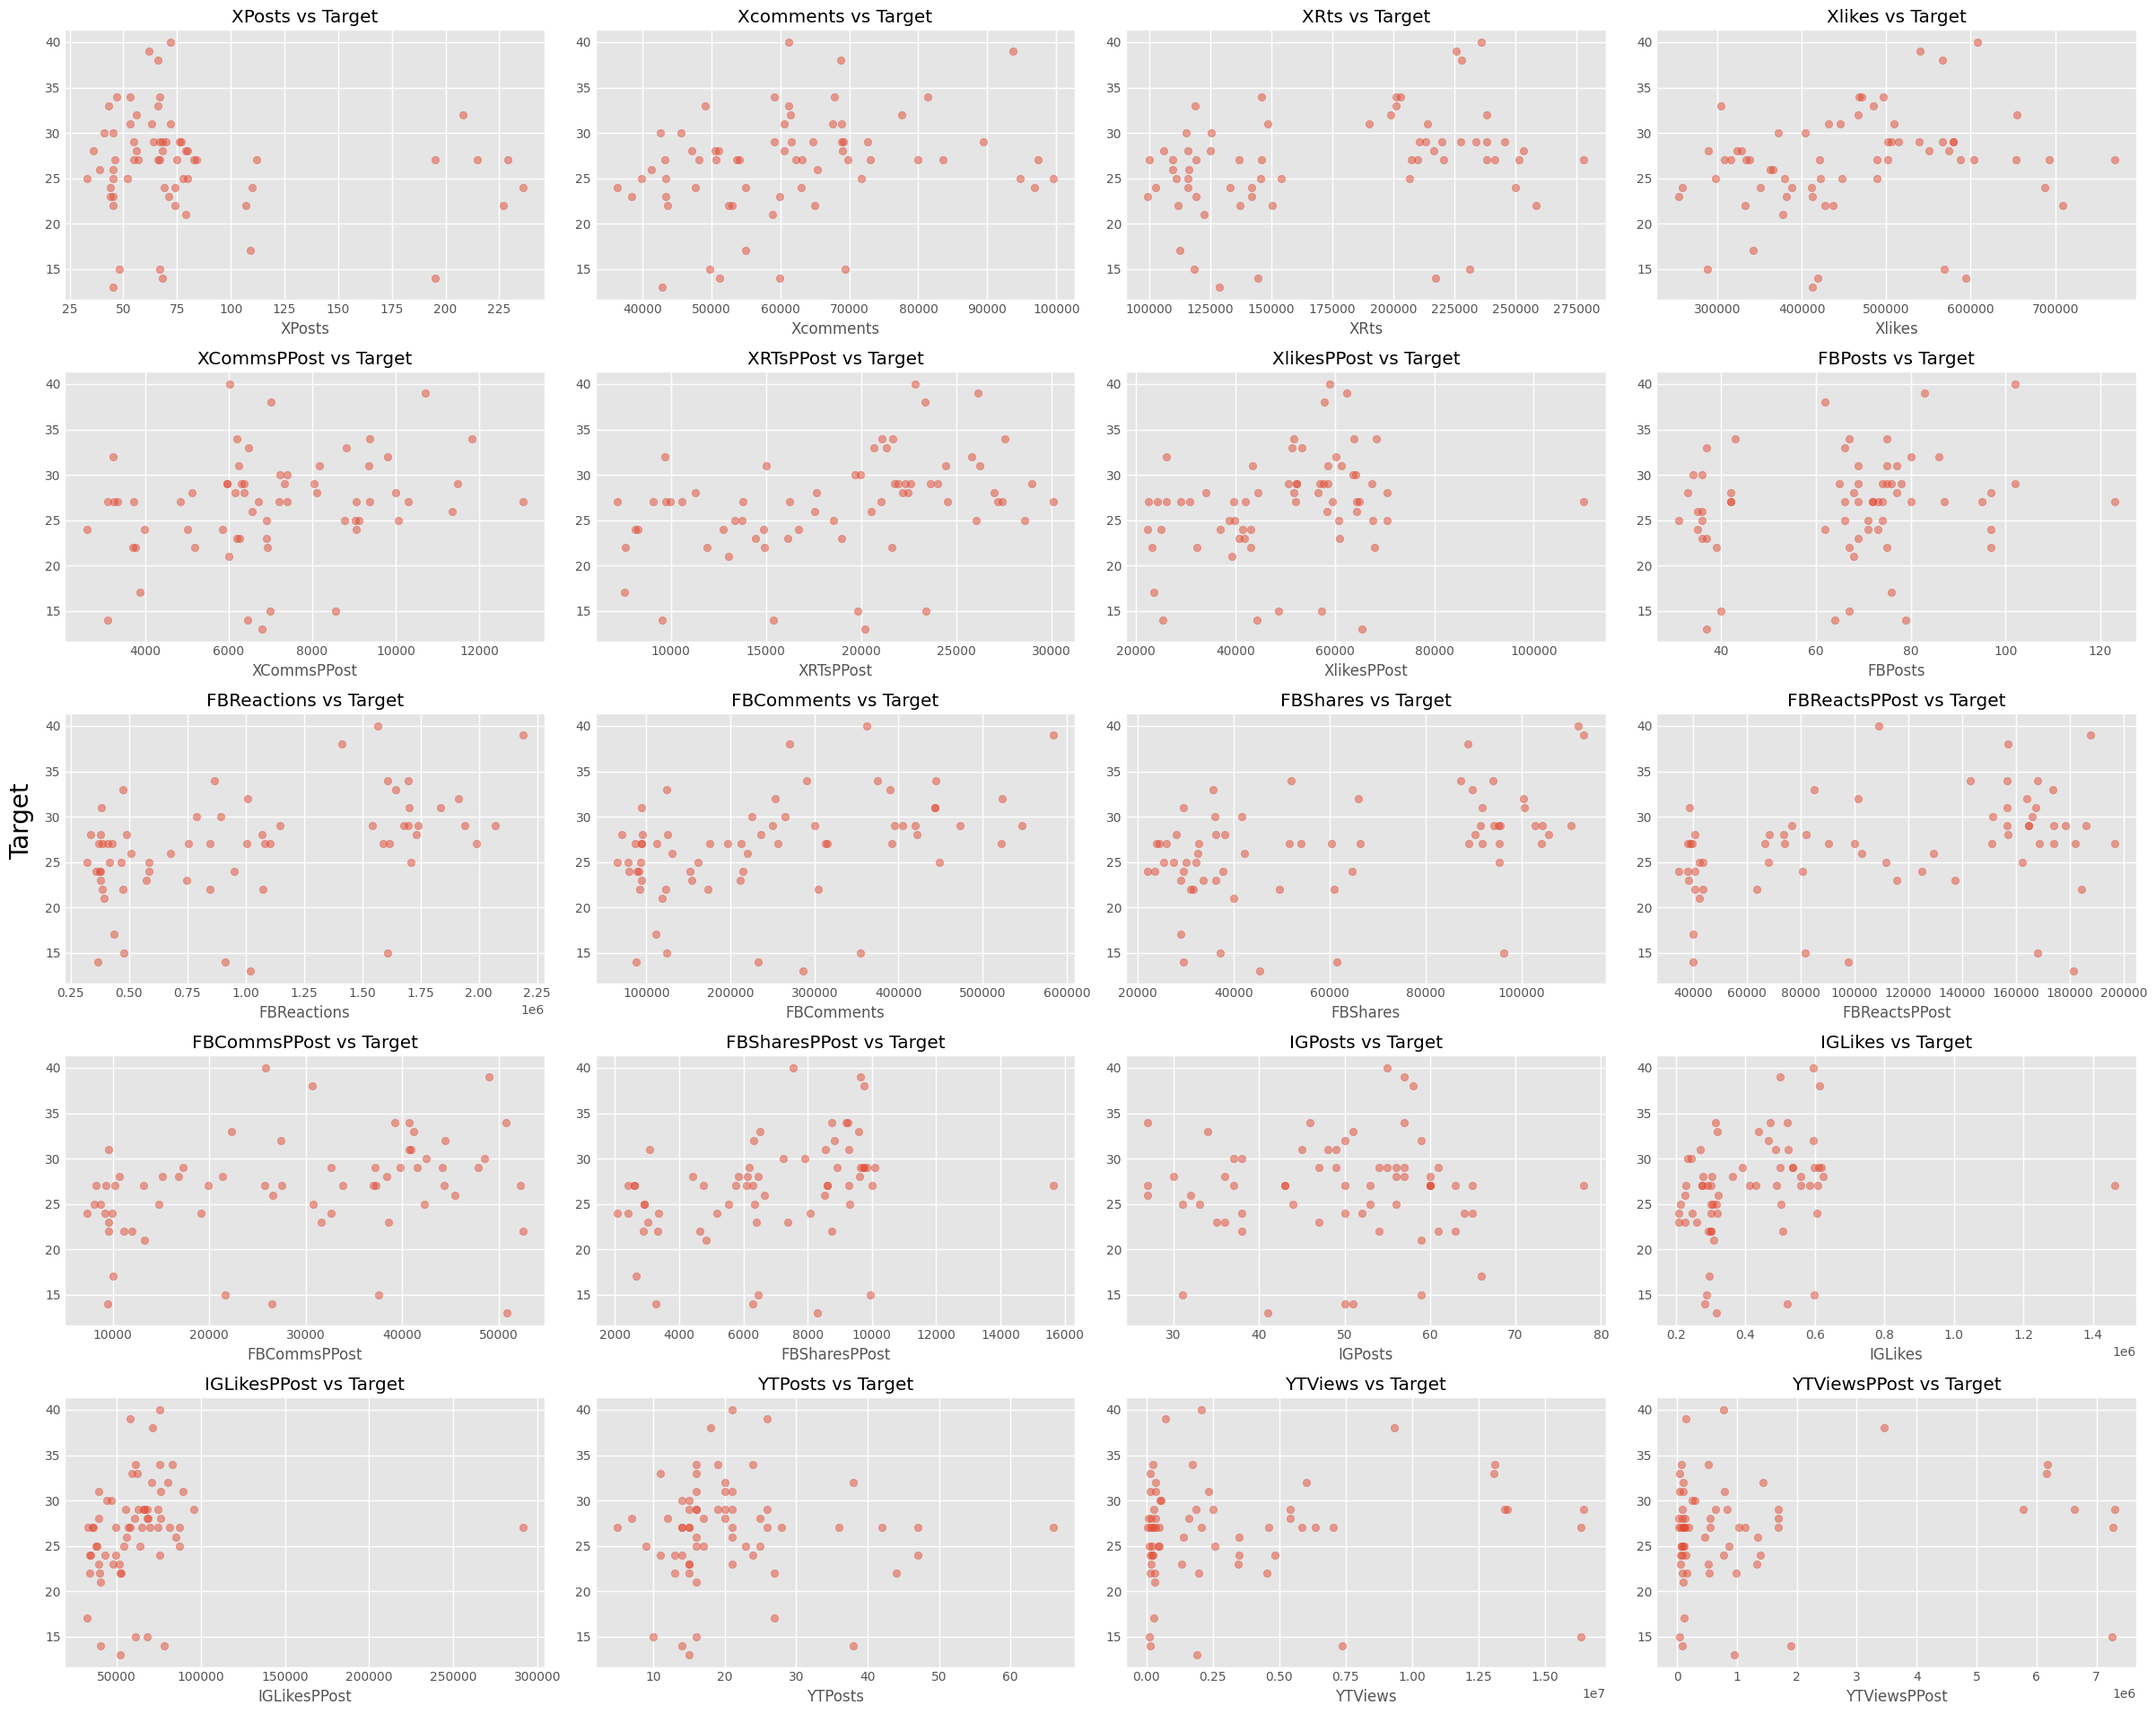

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame with feature columns and a 'Target' column
features = data.columns.drop('Target')  # Drop the target column from the features list

# Number of features
num_features = len(features)

# Set up the grid for subplots (e.g., 5 rows and 4 columns for 20 features)
rows = int(np.ceil(num_features / 4))  # Number of rows (4 columns per row)
cols = 4  # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))  # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Loop through each feature and create a scatter plot in the appropriate subplot
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['Target'], alpha=0.5)
    axes[i].set_title(f'{feature} vs Target')  # Set title for each subplot
    axes[i].set_xlabel(feature)

# Remove any empty subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Add a single overall y-axis label
fig.text(0.04, 0.5, 'Target', va='center', rotation='vertical', fontsize=20)

# Adjust layout to prevent overlap between subplots and the overall title
plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # Adjust 'rect' to create space for the y-label

# Show the plots
plt.show()



In [ ]:
model1 = LinearRegression()

predictions = []

features_included = feature_columns_all

importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../galvez/2_{i}.csv', usecols=columns, encoding="utf-8")
  # Training and testing data; Remove last row which is the testing row
  training = data.iloc[:-1]
  testing = pd.DataFrame(data.iloc[-1])
  testing = testing.T

  # Splitting
  X_train = training[features_included]
  X_test = testing[features_included]

  # Normalizing
  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  y_train = training[target]
  y_test = testing[target]
  
  model1.fit(X_train, y_train)

  prediction = model1.predict(X_test)

  prediction = prediction[0][0]

  if prediction <= 0:
    predictions.append(0)
  else:
    predictions.append(prediction)

  importances = importances + model1.coef_


In [ ]:
predictions

[22.08258236595193, 0, 0, 9.381881281881608, 0, 0, 0, 8.155296806192748, 0, 0]

In [ ]:
biggers = 0
zeros = 0
count = 0

for i in predictions:
  if i > 0:
    biggers += 1
    count += i
  else:
    zeros += 1
  
print(f"We have a total of {len(predictions)} predictions, {(zeros)} of them are below 0 and only {(biggers)} are not. Therefore our prediction is {count/biggers} based on {(biggers/len(predictions))*100}% of the data")

We have a total of 10 predictions, 7 of them are below 0 and only 3 are not. Therefore our prediction is 13.20658681800876 based on 30.0% of the data


In [ ]:
importances = importances[0]/len(predictions)

In [ ]:
importances

array([-5.44814077e-02,  8.87355325e-05, -2.11930543e-04,  9.30008955e-05,
       -7.73212593e-04,  1.61226037e-03, -6.26685035e-04, -1.61920249e-01,
        2.88579035e-06,  6.10210060e-06,  2.08784418e-04,  9.69381900e-05,
       -3.73943792e-04, -9.34330663e-04, -2.22581770e-01,  8.32943349e-06,
       -7.23074733e-05,  4.36404966e-02,  6.02985467e-07, -2.47172490e-06])

In [ ]:
len(importances)

20

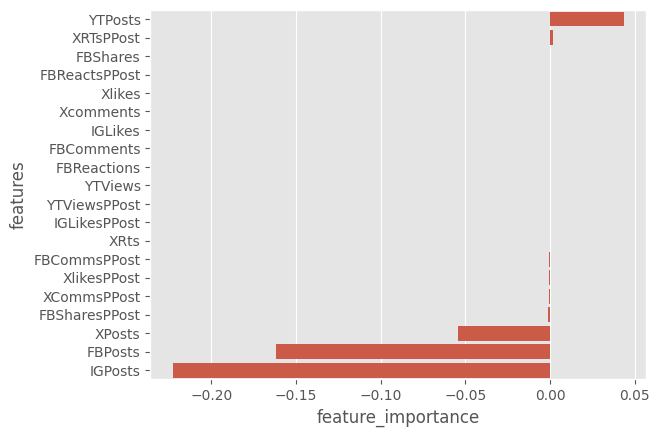

In [ ]:
plot_features(X_train.columns, importances, len(importances))

In [ ]:
mean_absolute_error(y_test, average(predictions))

3.8569972064613722

### Claudia Sheinbaum


In [ ]:
# Scan the file and set data
data = pd.read_csv(f'../claudia/1_7.csv', usecols=columns, encoding="utf-8")
# Training and testing data; Remove last row which is the testing row

training = data.iloc[:-1]
testing = pd.DataFrame(data.iloc[-1])
testing = testing.T

# Splitting
X_train = training[features_included]
X_test = testing[features_included]

# Normalizing
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

y_train = training[target]
y_test = testing[target]

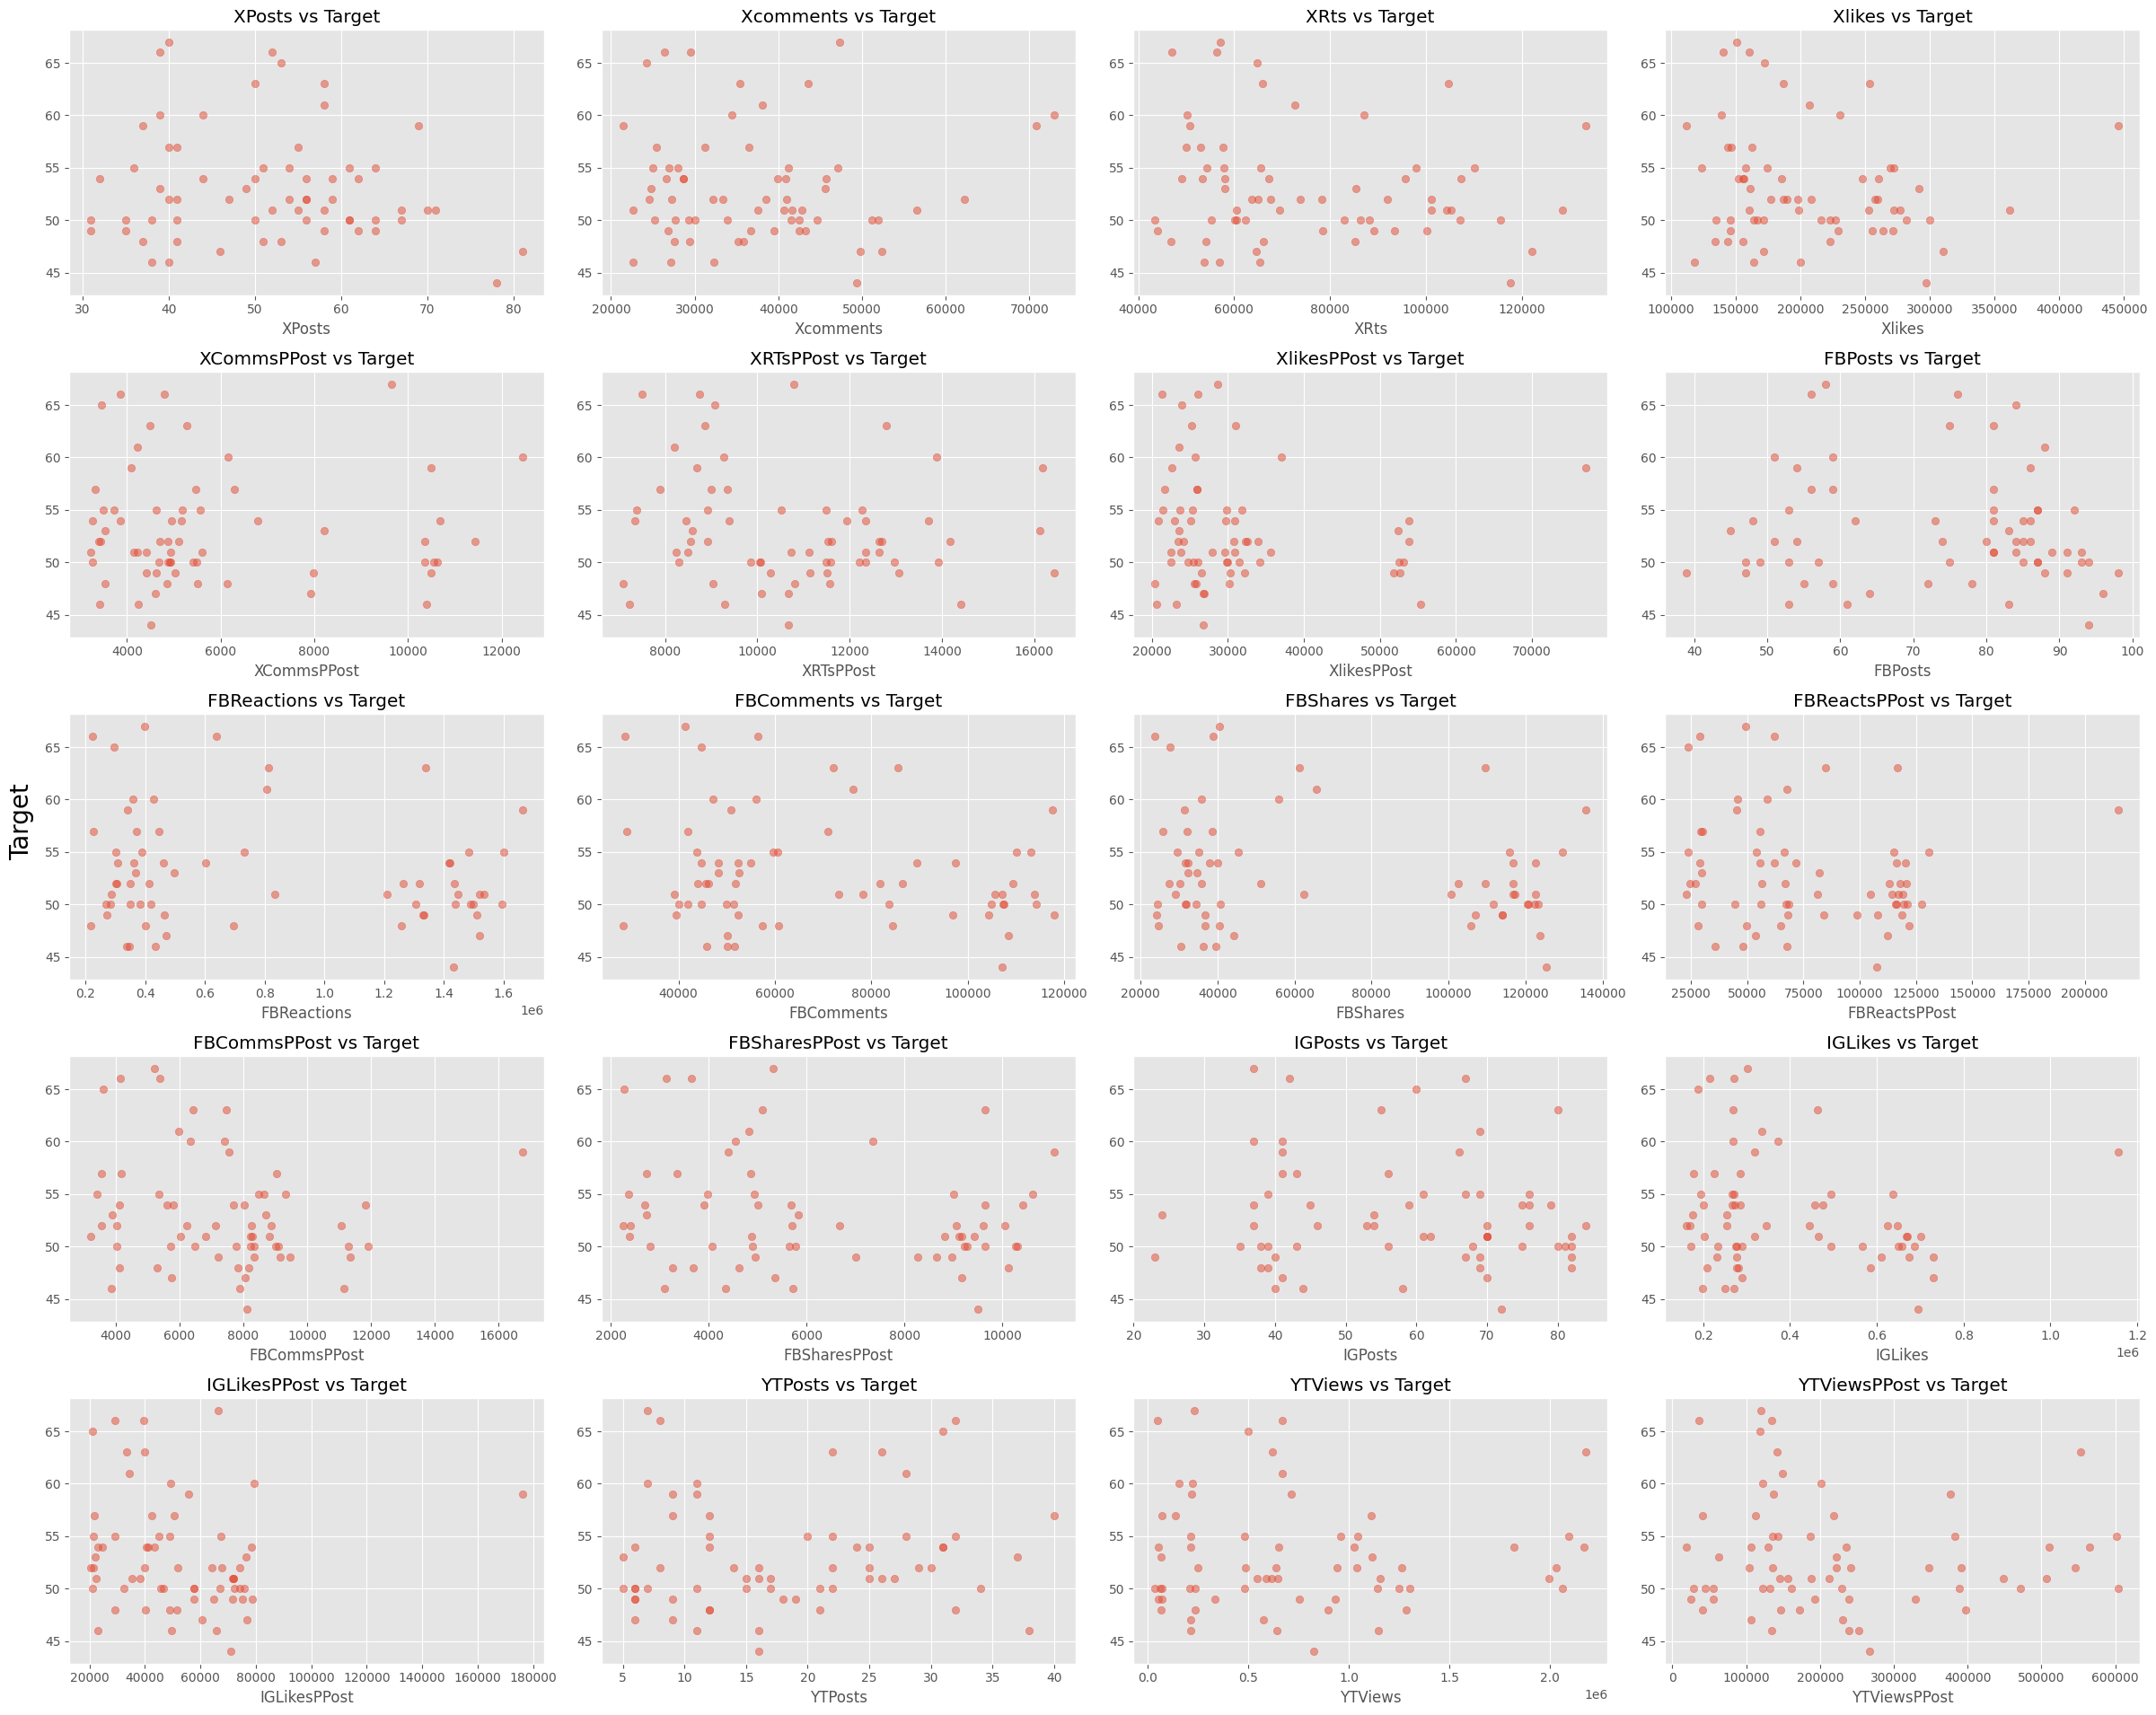

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame with feature columns and a 'Target' column
features = data.columns.drop('Target')  # Drop the target column from the features list

# Number of features
num_features = len(features)

# Set up the grid for subplots (e.g., 5 rows and 4 columns for 20 features)
rows = int(np.ceil(num_features / 4))  # Number of rows (4 columns per row)
cols = 4  # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))  # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Loop through each feature and create a scatter plot in the appropriate subplot
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['Target'], alpha=0.5)
    axes[i].set_title(f'{feature} vs Target')  # Set title for each subplot
    axes[i].set_xlabel(feature)

# Remove any empty subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Add a single overall y-axis label
fig.text(0.04, 0.5, 'Target', va='center', rotation='vertical', fontsize=20)

# Adjust layout to prevent overlap between subplots and the overall title
plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # Adjust 'rect' to create space for the y-label

# Show the plots
plt.show()

In [ ]:
model1 = LinearRegression()
predictions = []

features_included = feature_columns_all

importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../claudia/1_{i}.csv', usecols=columns, encoding="utf-8")
  # Training and testing data; Remove last row which is the testing row
  training = data.iloc[:-1]
  testing = pd.DataFrame(data.iloc[-1])
  testing = testing.T

  # Splitting
  X_train = training[features_included]
  X_test = testing[features_included]

  x_train_scaled = normalizer.fit_transform(X_train)
  x_test_scaled = normalizer.transform(X_test)

  y_train = training[target]
  y_test = testing[target]
  
  model1.fit(x_train_scaled, y_train)

  prediction = model1.predict(x_test_scaled)

  prediction = prediction[0][0]
  
  predictions.append(prediction)

  importances = importances + model1.coef_

In [ ]:
len(predictions), average(predictions)

(10, 19.26079528459102)

In [ ]:
biggers = 0
zeros = 0
count = 0

for i in predictions:
  if i > 0:
    biggers += 1
    count += i
  else:
    zeros += 1
  
print(f"We have a total of {len(predictions)} predictions, {(zeros)} of them are below 0 and only {(biggers)} are not. Therefore our prediction is {count/biggers} based on {(biggers/len(predictions))*100}% of the data")

We have a total of 10 predictions, 4 of them are below 0 and only 6 are not. Therefore our prediction is 37.6430998858847 based on 60.0% of the data


In [ ]:
importances

array([[-288.35495165, -342.26707048,  538.67812727,  -27.23906105,
         316.45380299, -318.14642822,  144.83241992, -324.77825505,
         191.79323427,  844.25674254, -380.84971336, -225.12998382,
        -489.61810671,  274.19863338,  379.41560696, -602.87510499,
         160.16692775,   74.28591574, -303.3900215 ,  165.82334183]])

In [ ]:
importances = importances[0]/len(predictions)

In [ ]:
importances

array([-28.83549517, -34.22670705,  53.86781273,  -2.72390611,
        31.6453803 , -31.81464282,  14.48324199, -32.47782551,
        19.17932343,  84.42567425, -38.08497134, -22.51299838,
       -48.96181067,  27.41986334,  37.9415607 , -60.2875105 ,
        16.01669277,   7.42859157, -30.33900215,  16.58233418])

In [ ]:
len(importances)

20

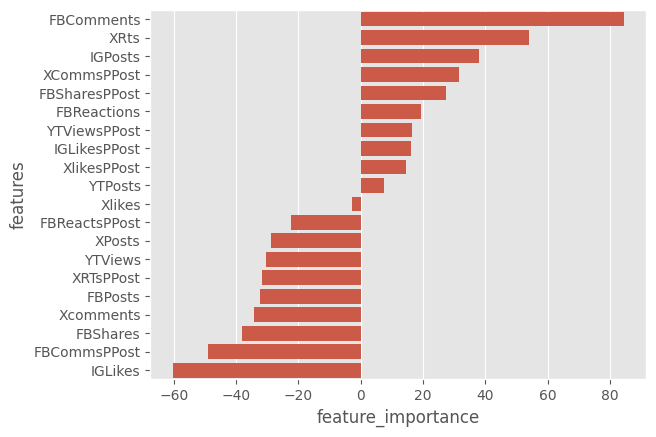

In [ ]:
plot_features(X_train.columns, importances, len(importances))

### Álvarez Maynez

In [ ]:
# Scan the file and set data
data = pd.read_csv(f'../maynez/3_7.csv', usecols=columns, encoding="utf-8")
# Training and testing data; Remove last row which is the testing row

training = data.iloc[:-1]
testing = pd.DataFrame(data.iloc[-1])
testing = testing.T

# Splitting
X_train = training[features_included]
X_test = testing[features_included]

# Normalizing
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

y_train = training[target]
y_test = testing[target]

In [ ]:
y_test

,Target
30,10.0


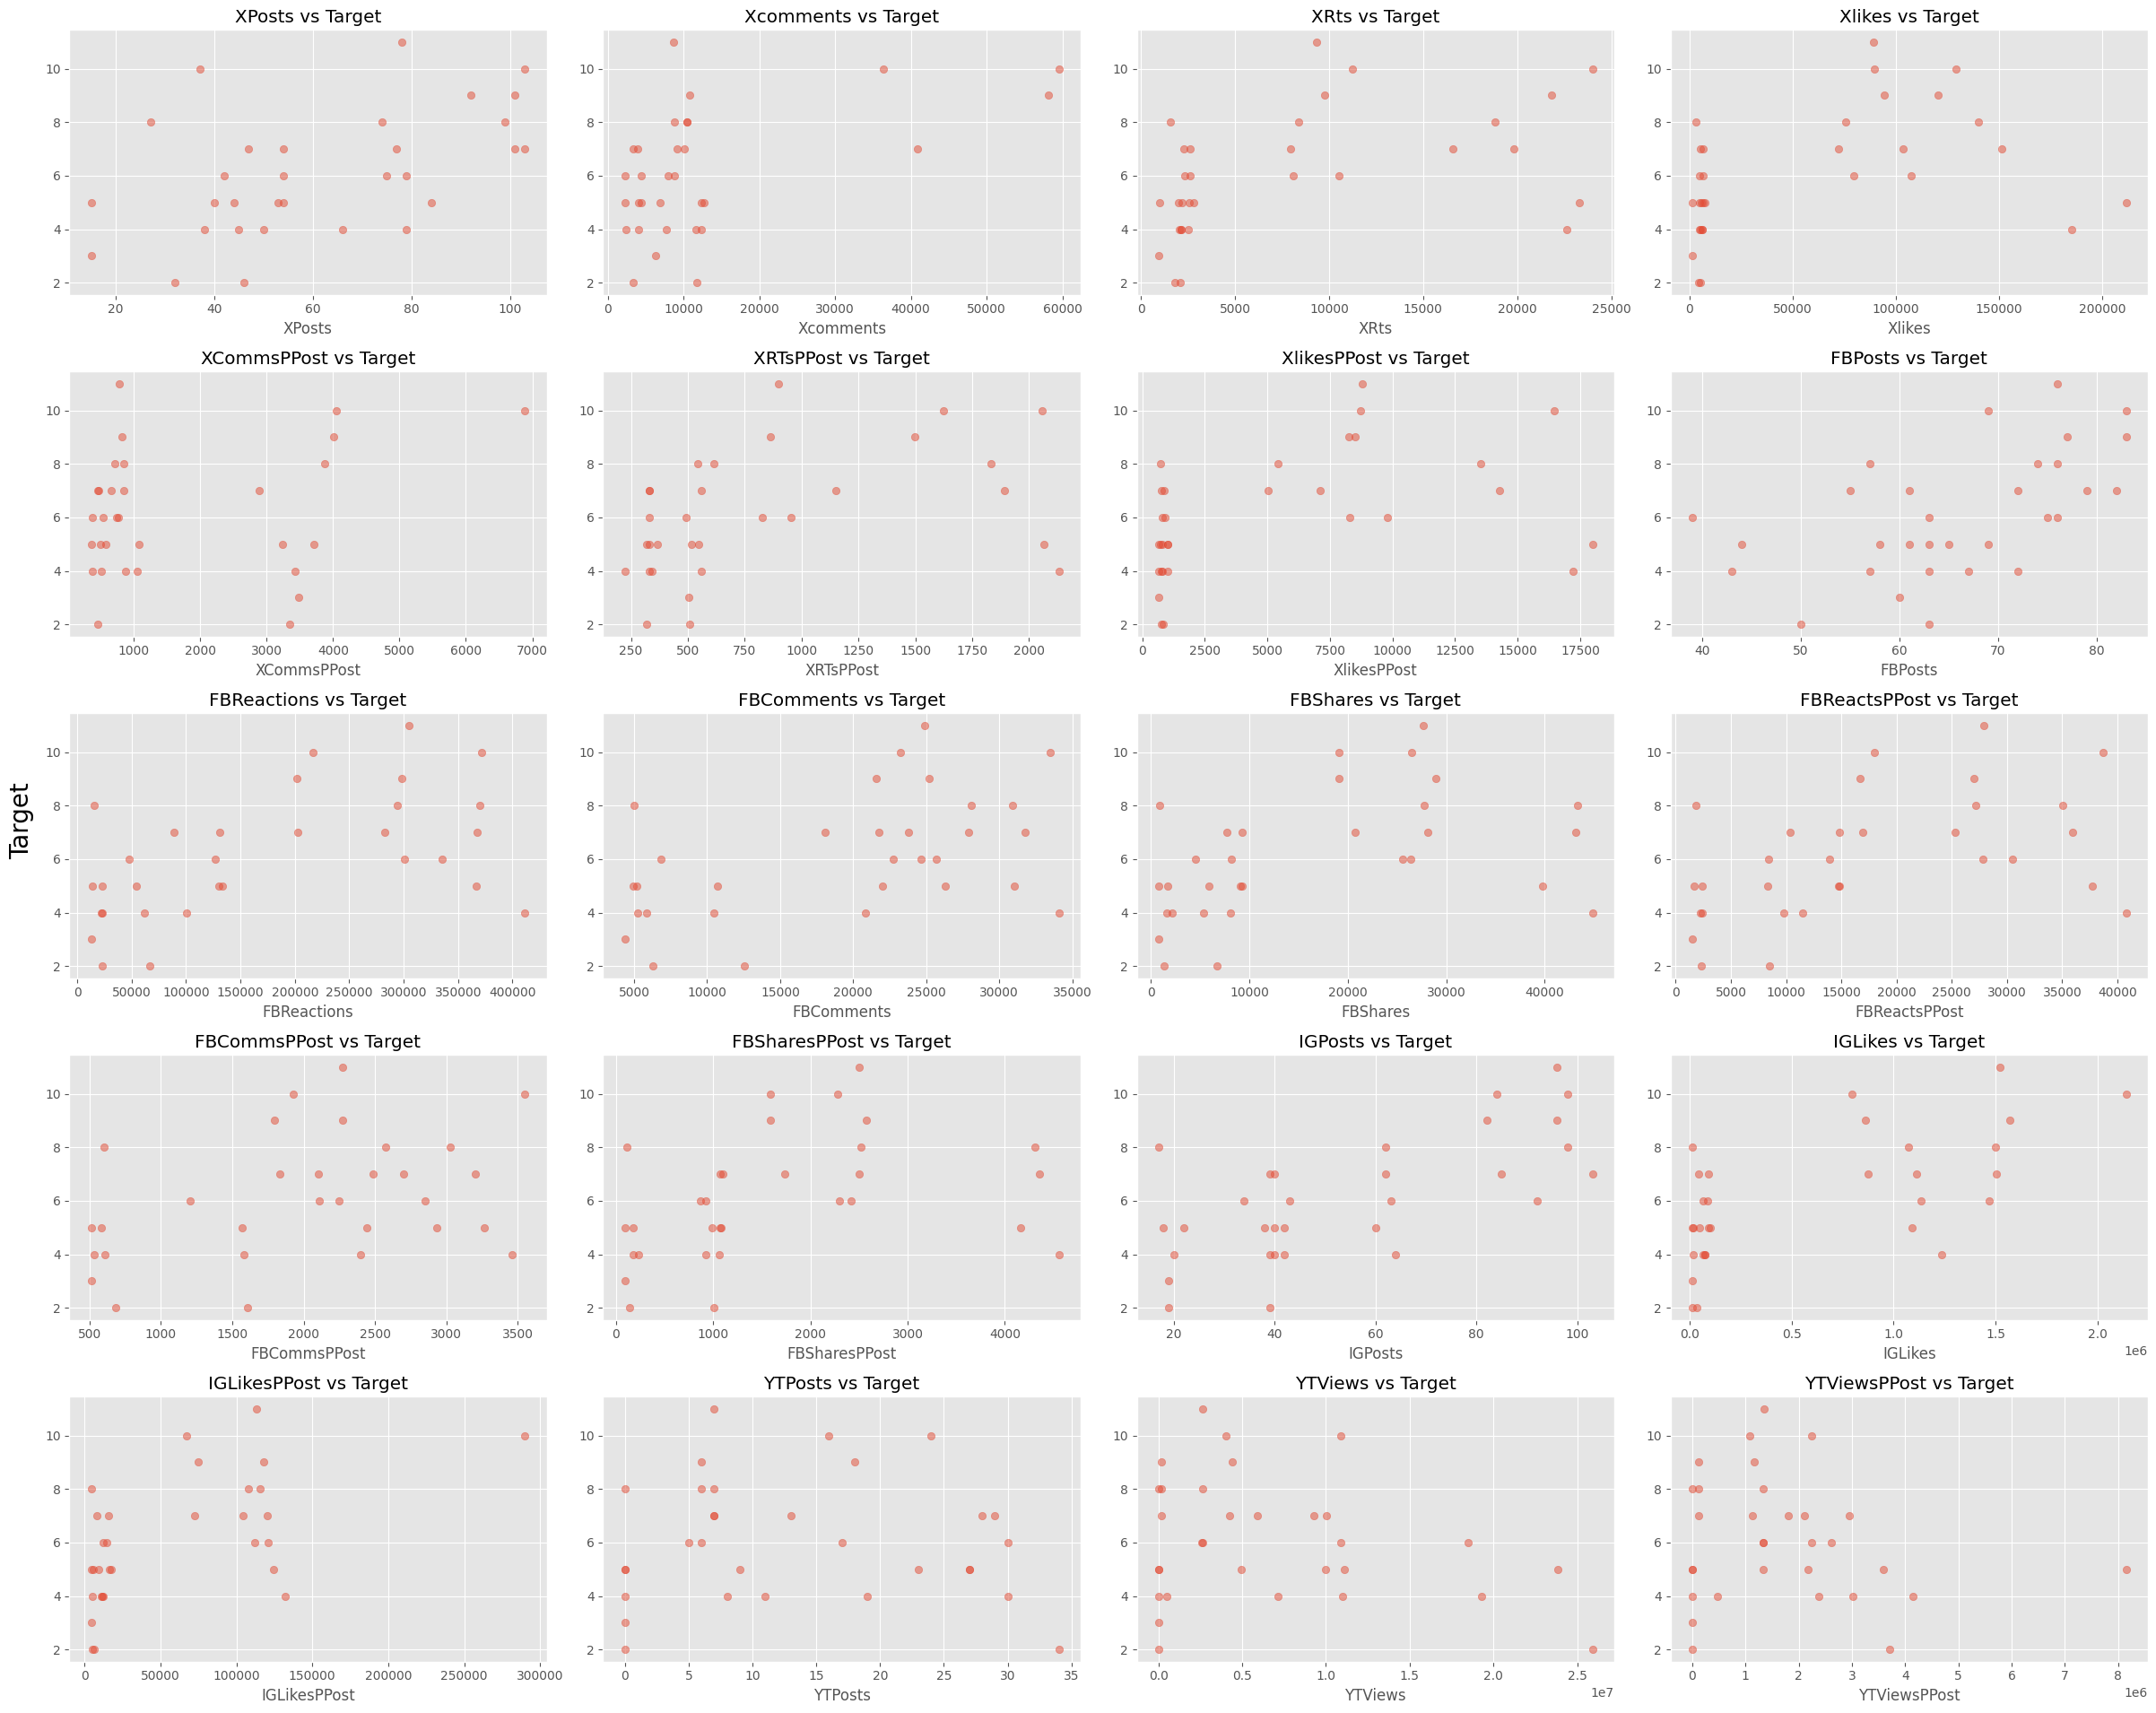

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame with feature columns and a 'Target' column
features = data.columns.drop('Target')  # Drop the target column from the features list

# Number of features
num_features = len(features)

# Set up the grid for subplots (e.g., 5 rows and 4 columns for 20 features)
rows = int(np.ceil(num_features / 4))  # Number of rows (4 columns per row)
cols = 4  # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))  # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Loop through each feature and create a scatter plot in the appropriate subplot
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['Target'], alpha=0.5)
    axes[i].set_title(f'{feature} vs Target')  # Set title for each subplot
    axes[i].set_xlabel(feature)

# Remove any empty subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Add a single overall y-axis label
fig.text(0.04, 0.5, 'Target', va='center', rotation='vertical', fontsize=20)

# Adjust layout to prevent overlap between subplots and the overall title
plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # Adjust 'rect' to create space for the y-label

# Show the plots
plt.show()

In [ ]:
model1 = LinearRegression()
predictions = []

features_included = feature_columns_all

importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../maynez/3_{i}.csv', usecols=columns, encoding="utf-8")
  # Training and testing data; Remove last row which is the testing row
  training = data.iloc[:-1]
  testing = pd.DataFrame(data.iloc[-1])
  testing = testing.T

  # Splitting
  X_train = training[features_included]
  X_test = testing[features_included]

  x_train_scaled = normalizer.fit_transform(X_train)
  x_test_scaled = normalizer.transform(X_test)

  y_train = training[target]
  y_test = testing[target]
  
  model1.fit(x_train_scaled, y_train)

  prediction = model1.predict(x_test_scaled)

  prediction = prediction[0][0]
  
  predictions.append(prediction)

  importances = importances + model1.coef_

In [ ]:
biggers = 0
zeros = 0
count = 0

for i in predictions:
  if i > 0:
    biggers += 1
    count += i
  else:
    zeros += 1
  
print(f"We have a total of {len(predictions)} predictions, {(zeros)} of them are below 0 and only {(biggers)} are not. Therefore our prediction is {count/biggers} based on {(biggers/len(predictions))*100}% of the data")

We have a total of 10 predictions, 2 of them are below 0 and only 8 are not. Therefore our prediction is 28.772968809104498 based on 80.0% of the data


In [ ]:
len(predictions), average(predictions)

(10, 11.938761027399226)

In [ ]:
predictions

[37.64615487547415,
 2.644134321757088,
 1.7296350109952288,
 90.0372186545872,
 19.64016764859469,
 29.737171323208486,
 2.909820822817167,
 -45.19456646929957,
 45.83944781540196,
 -65.60157372954417]